In [77]:
import keras_tuner as kt 
from yellowbrick.model_selection import RFECV
from sklearn.feature_selection import RFE, RFECV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Input
import numpy as np
import time
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(42)

In [134]:
# The training data.
train = pd.read_csv('../data/Train.csv')
test = pd.read_csv('../data/Test.csv')
ss = pd.read_csv('../data/SampleSubmission.csv')
train.shape, test.shape


# // The training data has many features so that could lead to a curse of dimensionality 
    # // dimentionality reduction - PCA and other methods
    # // feature selection for importance features ()

((83148, 29), (25584, 28))

In [135]:
# // only the target is not present in the testing set
    # // there is no column mismatch

for column in train.columns:
    if column not in test.columns:
        print(column)

burn_area


In [136]:
# // Investigate missing values
    # // There are no missing values

train.isnull().any().any(), test.isnull().any().any(), ss.isnull().any().any()

(False, False, False)

In [81]:
# Look at distribution of each variable
train.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


The skew value for the label is:  7.675599412401078


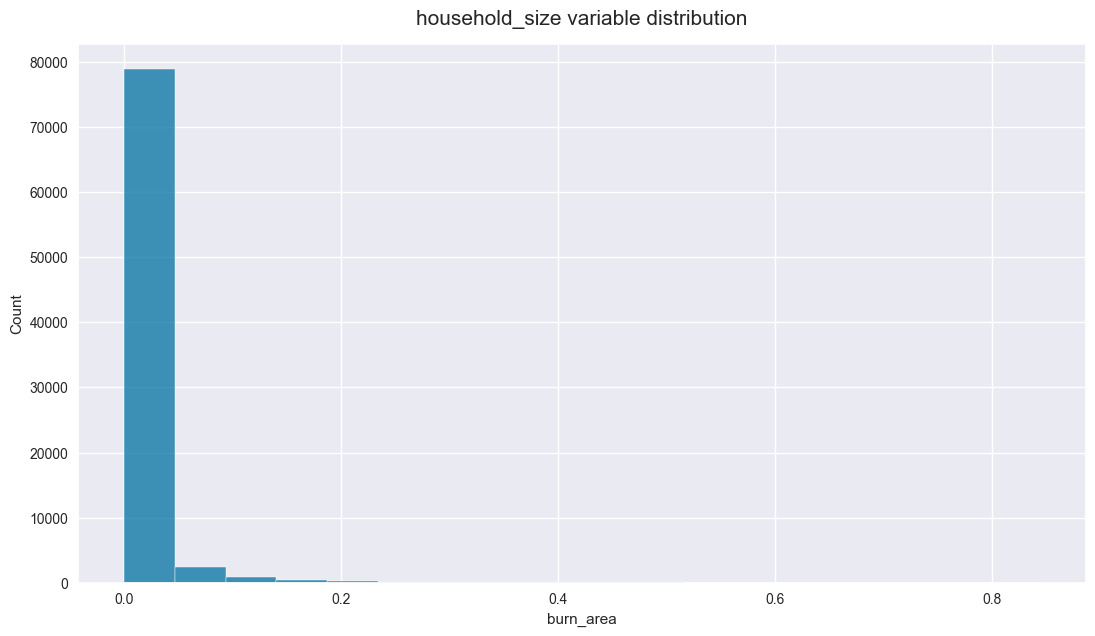

In [137]:
# // The target is highly skewed
    # // we need to transform it

print(f'The skew value for the label is:  {train.burn_area.skew()}')

sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.burn_area)
plt.title('household_size variable distribution', y = 1.02, fontsize = 15)
plt.show()

In [138]:
# // Investigate some transformation techniques

print(np.log1p(train.burn_area).skew())
print(np.cbrt(train.burn_area).skew())
print(np.sqrt(train.burn_area).skew())
print((train.burn_area ** float(1/1024)).skew()) # This is the optimal one

6.643186378864086
2.2837509973123558
3.200003493842135
1.2592819360219192


After transformation  the skew value for the label is:  1.2592819360219192


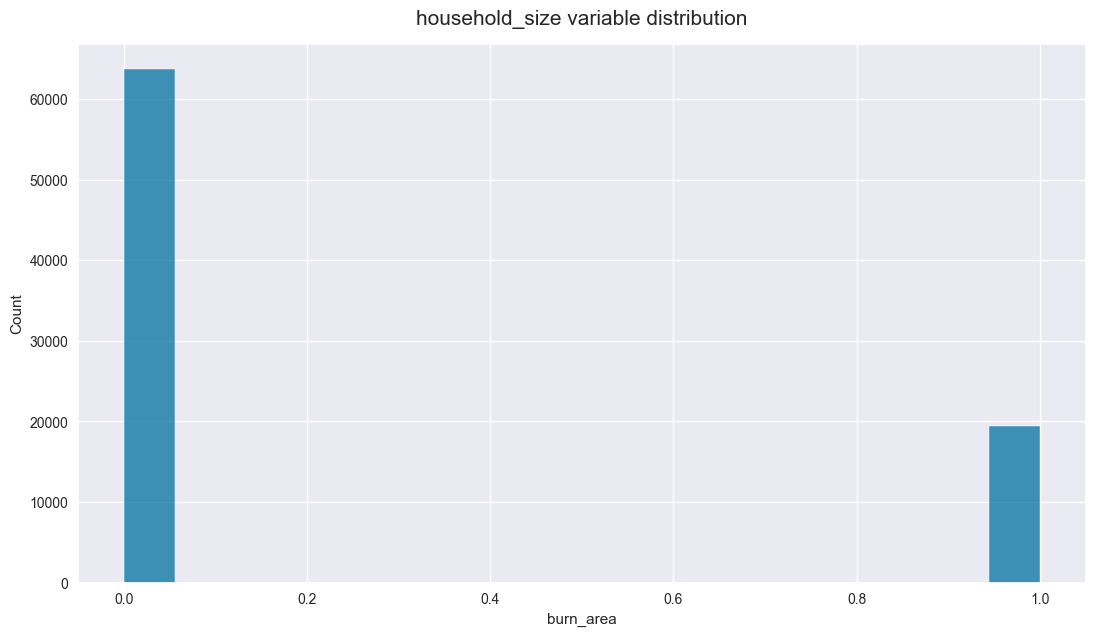

In [139]:
# // The target is highly skewed
    # // we need to transform it

print(f'After transformation  the skew value for the label is:  {(train.burn_area ** float(1/1024)).skew()}')

sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.burn_area ** float(1/1024))
plt.title('household_size variable distribution', y = 1.02, fontsize = 15)
plt.show()

<Axes: >

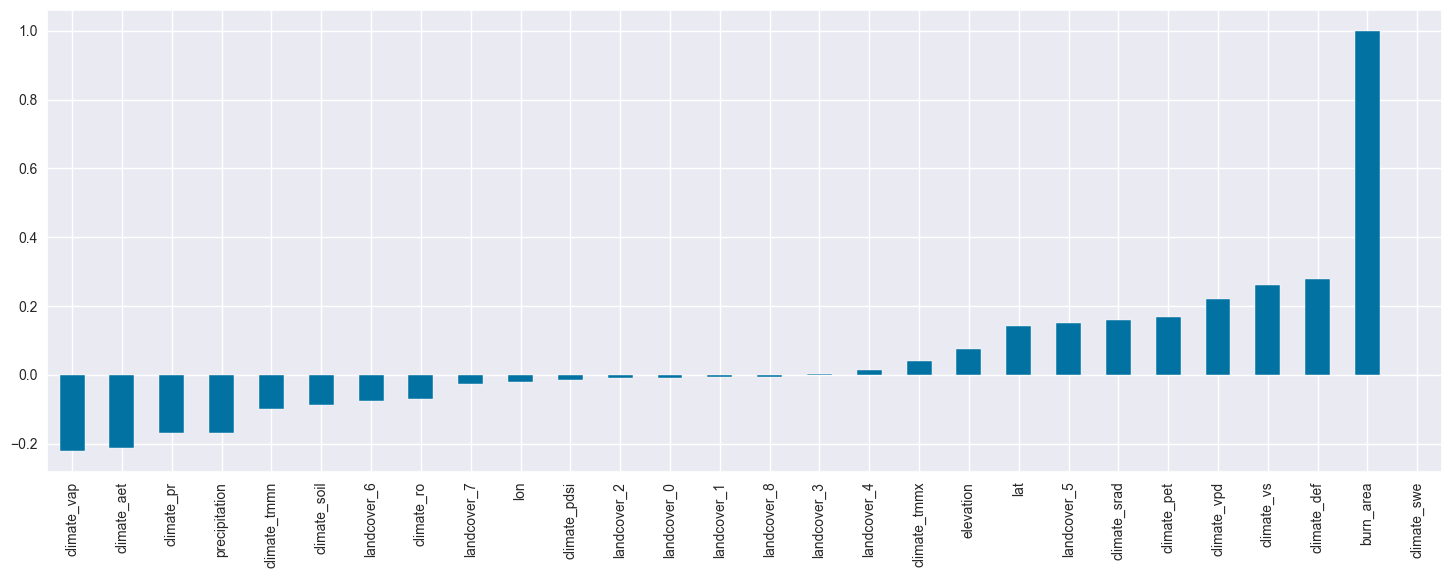

In [85]:
# Look at correlation with target
train.select_dtypes(include=['number']).corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))

##  Adding date features

In [86]:
# //  Date variables

train['burn_area'] = train.burn_area ** float(1/1024)
train['date'] = pd.to_datetime(train['ID'].apply(lambda x: x.split('_')[1]))
test['date'] = pd.to_datetime(test['ID'].apply(lambda x: x.split('_')[1]))
train['burn_area'] = pd.to_numeric(train['burn_area'], errors='coerce')

train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train['day'] = train.date.dt.weekday
train['quarter'] = train.date.dt.quarter
train['dayofmonth'] = train.date.dt.day
train['dayofyear'] = train.date.dt.dayofyear
train['weekofyear'] = train.date.dt.isocalendar().week


## Utility Functions

In [87]:
# // Scaling

def scaler(X_train, X_test, minmax: bool=False):
    stdscaler = StandardScaler()
    X_train = stdscaler.fit_transform(X_train)
    X_test = stdscaler.transform(X_test)

    if minmax:
        minmaxscaler = MinMaxScaler(feature_range=(0,1))
        X_train = minmaxscaler.fit_transform(X_train)
        X_test = minmaxscaler.transform(X_test)
    return X_train, X_test


# // featur selection

def feature_selection(X_train, X_test, y_train, index: int=train.shape[1]) -> tuple:
    sel = RFE(
        estimator=RandomForestRegressor(
            n_estimators=100, random_state=42, n_jobs=-1
        ),
        n_features_to_select=index
    )
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train) 
    X_test_rfe = sel.transform(X_test)
    return X_train_rfe, X_test_rfe


# // Discretization

def binning(data: pd.DataFrame) -> pd.DataFrame:
    def optimal_k(data: pd.DataFrame, column: str, max_k: int=10):
        silhouette_scores = []
        X = data[column].values.reshape(-1, 1)
        for k in range(2, max_k+1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X)
            score = silhouette_score(X, kmeans.labels_)
            silhouette_scores.append(score)
            optimal_k = range(2, max_k+1)[silhouette_scores.index(max(silhouette_scores))]
        return optimal_k

    numerics = []
    for i in data.columns:
        if data[i].dtype == 'float' or data[i].dtype == 'int':
            numerics.append(i)

    for column in numerics:
        k = optimal_k(data, column)
        reshaped_data = data[column].values.reshape(-1, 1)
        kmeans = KMeans(n_clusters=k, random_state=42)
        data[column] = kmeans.fit_predict(reshaped_data)
    return data


# // Handling outliers
    # // find other methods as well


def capping(data: pd.DataFrame, numerics=[]) -> pd.DataFrame:
    for col in numerics:
        q1 = data[col].quantile(0.25)
        q2 = data[col].quantile(0.75)
        iqr = q2 - q1
        max_limit = q2 + (1.5 * iqr)
        min_limit = q1 - (1.5 * iqr)
        data[col]  = pd.DataFrame(
            np.where(data[col] > max_limit, max_limit,
            (np.where(data[col] < min_limit, min_limit, data[col]))), columns=[col]
        )
    return data


# // Get the best model

def best_model(errors):
    scores = []
    for model in errors:
        scores.append(model['score'])
    for model in errors:
        if model[scores] == min(scores):
            return model['model']

## Machine Learning

In [115]:
# // data splicing


in_cols = []
target_col = 'burn_area'
for column in train.columns:
       if column != target_col:
              in_cols.append(column)

in_cols.remove('date')
in_cols.remove('ID')

train_all = train.copy().dropna()
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date > '2011-01-01']


X_train, y_train = train[in_cols], train[target_col]
X_valid, y_valid = valid[in_cols], valid[target_col]



In [11]:
# // Get Feature Selection Index Value from diagram

visualizer = RFECV(
    RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1, criterion='squared_error'),
    step=1, cv=3, scoring="neg_root_mean_squared_log_error"
)
visualizer.fit(X_train, y_train)
plt.figure(figsize=[5.6, 4])
visualizer.show()


In [126]:
# // Crucial Variables

cap_data = False
bin_data = False
select_data = False
scale_data = False
reduce_dimension = False
n=2
index = 10
minmax=True

In [127]:
# // apply utility
    # // capping outliers
    # // discretization
    # // feature selection
    # // Normalization
    # // PCA


if cap_data:
    train = capping(train)
    test = capping

if bin_data:
    train_binned = binning(train)
    test_binned = binning(test)

if select_data:
    X_train, X_valid = feature_selection(X_train, X_valid, y_train, index=index)

if scale_data:
    X_train, X_valid = scaler(X_train=X_train, X_test=X_valid, minmax=minmax)

if reduce_dimension:
    pca = PCA(n_components=n, random_state=42)
    pca = pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_valid = pca.transform(X_valid)

In [122]:

# // Train a couple of models


errors = []

ridge = Ridge(alpha=1, solver='svd')
ridge.fit(X_train, y_train)
preds = ridge.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "Ridge", 'score': rmse})
print("The Ridge error is {}".format(rmse))


random_F = RandomForestRegressor(random_state=42, criterion='squared_error', bootstrap=False)
random_F.fit(X_train, y_train)
preds = random_F.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "RandomForest", 'score': rmse})
print("The RandomForest error is {}".format(rmse))


svr = SVR(kernel='poly', gamma='auto', C=10)
svr.fit(X_train, y_train)
preds = svr.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "SVR", 'score': rmse})
print("The SVR error is {}".format(rmse))


ada = AdaBoostRegressor(random_state=42, estimator=random_F, learning_rate=1e-4)
ada.fit(X_train, y_train)
preds = ada.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "AdaBoost", 'score': rmse})
print("The AdaBoost error is {}".format(rmse))


kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(X_train, y_train)
preds = kn.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "KNeighbors", 'score': rmse})
print("The KNeighbours error is {}".format(rmse))

In [ ]:
# // Hyper-parameter tuning


def grid_search(model, params):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_params_, np.sqrt(-grid.best_score_)


models = {
    "Ridge Regression": {
        "model": Ridge(
            random_state=42,
            solver='svd'
        ),
        "params": {
            "alpha": [0.1, 1, 10, 100]
        }
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(
            random_state=42,
            learning_rate=1e-4,
            criterion='squared_error'
        ),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 10, 20, 30]
        }
    },
    "Gradient Boosting Regression": {
        "model": GradientBoostingRegressor(
            random_state=42,
            criterion='squared_error'
        ),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5, 7]
        }
    },
    "K-Nearest Neighbors Regression": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }
    },
    "LGBMRegressor": {
        "model": lgb.LGBMRegressor(learning_rate=1e-4),
        "params": {
                    'num_leaves': [31, 50, 70],
                    'n_estimators': [10, 20, 50],
                    'max_depth': [-1, 10, 20],
                    'subsample': [0.6, 0.8, 1.0],
                }
    },
    "XGBRegressor": {
        "model": xgb.XGBRegressor(
            base_score=0.5,
            booster='gbtree',    
            n_estimators=50,
            objective='reg:linear',
            max_depth=3,
            learning_rate=0.01
        ),
        "params": {
            'max_depth': [3, 5, 7],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2]
        }
    }
}


results = {}
for name, config in models.items():
    model, params, score = grid_search(config['model'], config['params'])
    results[name] = {'Best Model': model, 'Best Params': params, 'RMSE': score}

# Print the results
for name, result in results.items():
    print(f"{name} - Best Params: {result['Best Params']}, RMSE: {result['RMSE']}")


best_model_name = min(results, key=lambda x: results[x]['RMSE'])
tuned_ml_best_model = results[best_model_name]['Best Model']
test_rmse = np.sqrt(mean_squared_error(y_valid, tuned_ml_best_model.predict(X_valid)))
errors.append({'model': best_model_name, "score": test_rmse})

print(f"\nBest Model: {best_model_name}")
print(f"Test RMSE: {test_rmse}")

## Deep Learning

In [129]:


input_dim = X_train.shape[1]
noise_factor = 0.1
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_valid.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


input_data = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_data)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_noisy, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_valid))


encoder = Model(input_data, encoded)
X_train_encoded = encoder.predict(X_train_noisy)
X_valid_encoded = encoder.predict(X_test_noisy)


model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(X_train_encoded.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_encoded, y_train, epochs=50, batch_size=256, validation_data=(X_valid_encoded, y_valid))


preds = model.predict(X_valid_encoded)
rmse = mean_squared_error(y_valid, preds)**0.5
errors.append({"model": "ANN", 'score': rmse})
print(f'RMSE: {rmse}')


In [128]:
# // Hyper-parameter tuning - Keras-tuner



def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=128, max_value=512, step=32),
        activation='relu', 
        input_shape=(X_train_encoded.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dense(
        units=hp.Int('units_3', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mean_squared_error'
    )
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(X_train_encoded, y_train, epochs=50, validation_data=(X_valid_encoded, y_valid))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
tuned_model = tuner.hypermodel.build(best_hps)
history = tuned_model.fit(X_train_encoded, y_train, epochs=50, validation_data=(X_valid_encoded, y_valid))
preds = tuned_model.predict(X_valid_encoded)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
errors.append({"model": "Tuned ANN", 'score': rmse})

# Submission

In [ ]:
# // Working with the testing data


test = test.drop(['ID'], axis=1)
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year
test['day'] = test.date.dt.weekday
test['quarter'] = test.date.dt.quarter
test['dayofmonth'] = test.date.dt.day
test['dayofyear'] = test.date.dt.dayofyear
test['weekofyear'] = test.date.dt.isocalendar().week



best = best_model(errors=errors)
if best == "Ridge":
    model = ridge
elif best == "RandomForest":
    model = random_F
elif best == 'AdaBoost':
    model = ada
elif best == 'KNeighbors':
    model = kn
elif best == 'SVR':
    model = svr
elif best == "ANN":
    model = model
elif best == "Tuned ANN":
    model = tuned_model
elif best == best_model_name:
    model = tuned_ml_best_model


if reduce_dimension:
    test = pca.transform(test[in_cols]) 
    preds = model.predict(test)
else:
    preds = model.predict(test)[in_cols].fillna(0)


ss['burn_area'] = preds ** 1024             # // inverse of the transformation
ss['burn_area'] = ss['burn_area'].clip(0, 1)
today = time.time()
value = 1
ss.to_csv(f'{today}_submit{value}.csv', index=False)